In [22]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pandas as pd
from scipy.interpolate import CubicSpline
from scipy.linalg import solve, hilbert, norm
import time
sns.set()

# Zad 1

W tym zadaniu chcemy metodą iteracyjnego poprawiania rozwiązań rozwiązać układ równań.

W tym celu wyznaczymy macierz Hilberta $A$ oraz macierz $b$, a następnie rozwiążemy układ równań $Ax=b$ za pomocą funkcji wbudowanej $solve$. Obliczymy różnicę $r$ jako $r=b-Ax$, a następnie znajdziemy rozwiązanie układu równań dla tej różniczy $Ax=r$ i poprawimy rozwiązanie.

In [50]:
def iteracyjne_poprawianie(A, b, iteracje=1000, tolerancja=1e-10):
    #Znalezienie przybliżonego rozwiązania (można użyć metody Gaussa-Seidela z zad 2)
    A=A.astype(np.float32)
    b=b.astype(np.float32)
    x0=solve(A, b)
    
    #Metoda iteracyjnego poprawiania rozwiązań
    for i in range(iteracje):
        r=b-A.dot(x0)  # Obliczanie reszty
        
        if np.all(np.abs(r) < tolerancja):
            return x0
        
        delta_x=solve(A,r)
        corrected=x0+delta_x

    return corrected

In [51]:
A = hilbert(5)
b = np.array([5, 4, 3, 2, 1]).T

In [52]:
rozwiazanie= iteracyjne_poprawianie(A, b)
print("Rozwiązanie:", rozwiazanie)

Rozwiązanie: [   -94.93934   2158.7874  -10704.598    17911.688    -9445.885  ]


# Zad 2 i 3

In [26]:
def matrix(n):
    A = np.zeros((n, n))
    np.fill_diagonal(A, 4)
    A += np.diag(-np.ones(n-1), k=1)
    A += np.diag(-np.ones(n-1), k=-1)
    A[0, n-1] = 1
    A[n-1, 0] = 1
    
    b = np.zeros(n)
    b[-1] = 100
    
    return A, b

In [27]:
def gauss_seidel(n, iteracje=1000, tolerancja=1e-10):
    # Tworzenie macierzy A i wektora b
    A,b = matrix(n)
    # Inicjalizacja wektora x
    x = np.zeros(n)
    
    # Metoda Gaussa-Seidela
    for _ in range(iteracje):
        x_new = np.copy(x)
        for i in range(n):
            s1 = np.dot(A[i, :i], x_new[:i]) #ponizej przekatnej
            s2 = np.dot(A[i, i+1:], x[i+1:]) #powyzej przekatnej
            x_new[i] = (b[i] - s1 - s2) / A[i, i] #wzór
        
        # Sprawdzanie kryterium zbieżności
        if np.linalg.norm(x_new - x) < tolerancja:
            return x_new
        
        x = x_new
    
    return x

## Dla n=20

In [28]:
n=20
A, b = matrix(n)

### Rozwiązanie dokładne

In [29]:
start = time.time()
rozwiazanie_dokladne = np.linalg.solve(A, b)
czas_dokladny = time.time() - start

In [30]:
print("Rozwiązanie dokładne:", rozwiazanie_dokladne)
print("Czas metody dokładnej:", czas_dokladny)

Rozwiązanie dokładne: [-7.73502692e+00 -2.07259421e+00 -5.55349941e-01 -1.48805549e-01
 -3.98722562e-02 -1.06834753e-02 -2.86164518e-03 -7.63105381e-04
 -1.90776345e-04 -3.63138871e-20  1.90776345e-04  7.63105381e-04
  2.86164518e-03  1.06834753e-02  3.98722562e-02  1.48805549e-01
  5.55349941e-01  2.07259421e+00  7.73502692e+00  2.88675135e+01]
Czas metody dokładnej: 0.0


### Rozwiązanie Gauss-Seidel

In [31]:
start = time.time()
rozwiazanie_gauss_seidel = gauss_seidel(n)
czas_gauss_seidel = time.time() - start

In [32]:
print("\nRozwiązanie metodą Gaussa-Seidela:", rozwiazanie_gauss_seidel)
print("Czas metody Gaussa-Seidela:", czas_gauss_seidel)


Rozwiązanie metodą Gaussa-Seidela: [-7.73502692e+00 -2.07259421e+00 -5.55349941e-01 -1.48805549e-01
 -3.98722562e-02 -1.06834753e-02 -2.86164518e-03 -7.63105383e-04
 -1.90776347e-04 -1.12140772e-12  1.90776345e-04  7.63105381e-04
  2.86164518e-03  1.06834753e-02  3.98722562e-02  1.48805549e-01
  5.55349941e-01  2.07259421e+00  7.73502692e+00  2.88675135e+01]
Czas metody Gaussa-Seidela: 0.005982398986816406


## Dla n=4

In [33]:
n_new=4
A_4, b_4 = matrix(n_new)

### Rozwiązanie dokładne

In [34]:
start = time.time()
rozwiazanie_dokladne = np.linalg.solve(A_4, b_4)
czas_dokladny = time.time() - start

In [35]:
print("Rozwiązanie dokładne:", rozwiazanie_dokladne)
print("Czas metody dokładnej:", czas_dokladny)

Rozwiązanie dokładne: [-7.14285714  0.          7.14285714 28.57142857]
Czas metody dokładnej: 0.0


### Rozwiązanie Gaussa-Seidela

In [36]:
start = time.time()
rozwiazanie_gauss_seidel = gauss_seidel(n)
czas_gauss_seidel = time.time() - start

In [37]:
print("\nRozwiązanie metodą Gaussa-Seidela:", rozwiazanie_gauss_seidel)
print("Czas metody Gaussa-Seidela:", czas_gauss_seidel)


Rozwiązanie metodą Gaussa-Seidela: [-7.73502692e+00 -2.07259421e+00 -5.55349941e-01 -1.48805549e-01
 -3.98722562e-02 -1.06834753e-02 -2.86164518e-03 -7.63105383e-04
 -1.90776347e-04 -1.12140772e-12  1.90776345e-04  7.63105381e-04
  2.86164518e-03  1.06834753e-02  3.98722562e-02  1.48805549e-01
  5.55349941e-01  2.07259421e+00  7.73502692e+00  2.88675135e+01]
Czas metody Gaussa-Seidela: 0.004422426223754883


# Zad 4

In [38]:
# inicjalizacja macierzy B
n = 20
B = np.zeros((n, n))
B[np.arange(n), np.arange(n)] = np.arange(0.025, 0.525, 0.025)
B[np.arange(n-1), np.arange(1, n)] = 5.0

In [39]:
B

array([[0.025, 5.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   ],
       [0.   , 0.05 , 5.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   ],
       [0.   , 0.   , 0.075, 5.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.1  , 5.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.125, 5.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.15 , 5.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   ],
       [0.

In [40]:
# inicjalizacja wektora x
x_0 = np.ones(n)
x = x_0
eta_values = []
min_k = None

In [41]:
for k in range(1,101):
    x = np.dot(B, x)
    eta = np.linalg.norm(x, 2) / np.linalg.norm(x_0, 2) #liczenie ety
    eta_values.append(eta)
    if np.linalg.norm(x, 2) < np.linalg.norm(x_0, 2) and min_k is None: #wyznaczenie najmniejszego k
        min_k = k + 1

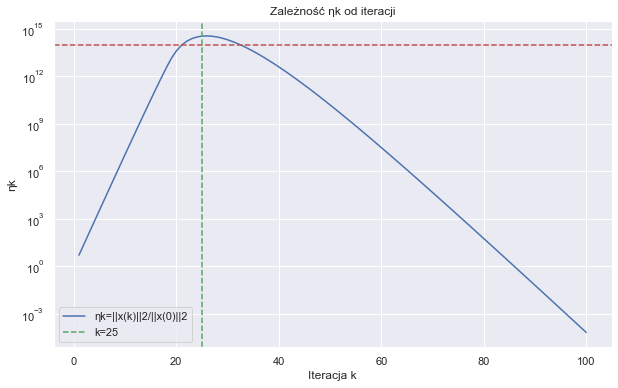

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), eta_values, label='ηk=||x(k)||2/||x(0)||2')
plt.axhline(y=10**14, color='r', linestyle='--')
plt.axvline(x=25, color='g', linestyle='--', label='k=25')
plt.xlabel('Iteracja k')
plt.ylabel('ηk')
plt.title('Zależność ηk od iteracji')
plt.yscale('log')  # Skala logarytmiczna
plt.legend()
plt.grid(True)
plt.show()